# Análise exploratória de dados

## 0. Imports

In [1]:
from IPython.display import display, Markdown, Image
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import inflection 

colors = ["#9467bd", "#057476", "#FF7A00"]
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

### 0.1 Coleta dos dados

In [2]:
df_raw = sns.load_dataset('healthexp')

In [3]:
df_raw.to_csv('../data/raw/df_raw.csv', index = False)
df_raw.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


## 1. Descrição dos dados

In [4]:
df1 = df_raw.copy()

<img src="../imgs/healthexp.PNG" alt="Descrição da imagem" width="500" height="500" style="display:block; margin:auto;">



<div style="text-align: justify;">
<span style="font-family: 'Times New Roman', Times, serif;">Este conjunto de dados contém informações sobre <strong>gastos com saúde</strong> e <strong>expectativa de vida</strong> em diversos países ao longo de 1970 a 2020. Cada entrada no conjunto de dados representa um país em um determinado ano e inclui o valor dos gastos com saúde em dólar e a expectativa de vida média em anos. Países como <strong>Alemanha, França, Reino Unido, Japão, EUA e Canadá </strong>estão incluídos, oferecendo uma análise das tendências globais ao longo do tempo.</span>
</div>


### 1.1 Dicionário de Dados

In [5]:
dicionario = pd.DataFrame([
    {
       "variavel" : "year",
       "descricao": "Indica o ano em que os dados foram registrados",
       "tipo"     : "quantitativa",
       "subtipo"  : "discreta"
    },
    {
       "variavel" : "country",
       "descricao": "Indica o país para o qual os dados se referem",
       "tipo"     : "qualitativa",
       "subtipo"  : "nominal"   
    },
    {
       "variavel" : "spending_usd",
       "descricao": "Representa o valor dos gastos com saúde em dolar para o país e o ano específico",
       "tipo"     : "quantitativa",
       "subtipo"  : "contínua"
    },
    {
       "variavel" : "life_expectancy",
       "descricao": "Indica a expectativa de vida média em anos para o país e o ano específico",
       "tipo"     : "quantitativa",
       "subtipo"  : "discreta"
    }
])

In [6]:
dicionario.to_csv('../data/external/dictionary.csv', index=False)
dicionario


,variavel,descricao,tipo,subtipo
0,year,Indica o ano em que os dados foram registrados,quantitativa,discreta
1,country,Indica o país para o qual os dados se referem,qualitativa,nominal
2,spending_usd,Representa o valor dos gastos com saúde em dol...,quantitativa,contínua
3,life_expectancy,Indica a expectativa de vida média em anos par...,quantitativa,discreta


### 1.2 Rename Columns

In [7]:
df1.columns

Index(['Year', 'Country', 'Spending_USD', 'Life_Expectancy'], dtype='object')

In [8]:
cols_old = ['Year', 'Country', 'Spending_USD', 'Life_Expectancy']

In [9]:
snakecase = lambda x: inflection.underscore( x )

cols_new = list (map (snakecase, cols_old))

#rename columns
df1.columns = cols_new

In [10]:
df1.columns

Index(['year', 'country', 'spending_usd', 'life_expectancy'], dtype='object')

### 1.3 Data Dimensions

In [11]:
print (' Number of Rows: {}'.format(df1.shape[0]))
print (' Number of Cols: {}'.format(df1.shape[1]))

 Number of Rows: 274
 Number of Cols: 4


### 1.4 Data Types

In [12]:
df1.dtypes

year                 int64
country             object
spending_usd       float64
life_expectancy    float64
dtype: object

In [13]:
df1.dtypes.value_counts()

float64    2
int64      1
object     1
Name: count, dtype: int64

In [14]:
df1.columns
#df1.describe().transpose()

Index(['year', 'country', 'spending_usd', 'life_expectancy'], dtype='object')

### 1.5 Check NA

#### 1.5.1 Method 1

In [16]:
df1.isna().sum()

Year               0
Country            0
Spending_USD       0
Life_Expectancy    0
dtype: int64

#### 1.5.2 Method 2

In [16]:
# colunas (variáveis) contendo valores valtantes
number_of_na_by_column = df1.isnull().sum().loc[lambda x: x > 0]
number_of_na_rows = df1.isnull().any(axis=1).sum()

display(number_of_na_by_column)
display(Markdown(
    "---\n"
    f"A partir dessa informação sabemos que as variáveis `{number_of_na_by_column.axes[0].to_list()}`"
    f"contém valores faltantes. Além disso sabemos que temos `{number_of_na_rows}` linhas com valores faltantes."
    "As próximas análises aqui serão realizadas sem considerar os dados faltantes"
    "\n\n ---"
))

df1.dropna(inplace=True)

Series([], dtype: int64)

---
A partir dessa informação sabemos que as variáveis `[]`contém valores faltantes. Além disso sabemos que temos `0` linhas com valores faltantes.As próximas análises aqui serão realizadas sem considerar os dados faltantes

 ---

### 1.6 Descriptive Statiscal

In [17]:
#df1.dtypes

In [18]:
num_attributes = df1.select_dtypes( include = ['int', 'float'])
cat_attributes = df1.select_dtypes(exclude=['int', 'float', 'datetime64[ns]'])

#### 1.6.1 Numerical Attributes


In [19]:
# métricas de dispersão e métricas de tendência central

# Central tendency: mean, median

ct1 = pd.DataFrame( num_attributes.apply( np.mean )).T
ct2 = pd.DataFrame(num_attributes.apply( np.median )).T

# Dispersion: std, min, max, range, shew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std )).T #desvio padrão
d2 = pd.DataFrame( num_attributes.apply( np.min )).T
d3 = pd.DataFrame( num_attributes.apply( np.max )).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min())).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew())).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis )).T

# concatenate

metricas = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6]).T.reset_index()
metricas.columns = ['features', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosie']

In [20]:
metricas

,features,min,max,range,mean,median,std,skew,kurtosie
0,year,1970.0,2020.0,50.0,1996.992701,1998.0,14.155031,-0.161325,<bound method NDFrame._add_numeric_operations....
1,spending_usd,123.993,11859.179,11735.186,2789.338905,2295.578,2190.930759,1.306576,<bound method NDFrame._add_numeric_operations....
2,life_expectancy,70.6,84.7,14.1,77.909489,78.1,3.270279,-0.202338,<bound method NDFrame._add_numeric_operations....


##### 1.6.1.1 Qual a distribuição dos dados (variável por variável)?

/tmp/ipykernel_3642/2433662118.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(
/tmp/ipykernel_3642/2433662118.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(
/tmp/ipykernel_3642/2433662118.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seab

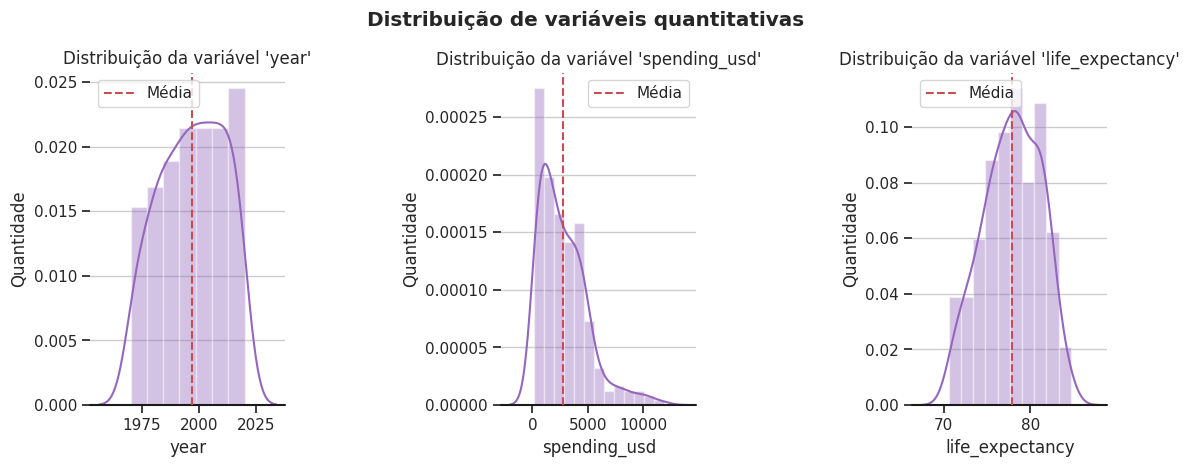

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(12,5))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='bold')

# Lista para armazenar os valores médios de cada variável
mean_values = []

# Iterar sobre cada variável
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa'").variavel.to_list()):
    ax = sns.distplot(
        df1[variavel],
        ax=axes.flatten()[i],
        color=colors[0],
        #alpha=0.9,
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    plt.xlabel(variavel)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')

    # Calcula a média da variável e armazena na lista
    mean_value = df1[variavel].mean()
    mean_values.append(mean_value)

    # Adiciona uma linha vertical em cada gráfico
    ax.axvline(mean_value, color='r', linestyle='--', label='Média')
    ax.legend()

# Calcula a média geral das médias de todas as variáveis
overall_mean_value = sum(mean_values) / len(mean_values)

plt.show()

---

Apresentou

---

/tmp/ipykernel_3642/3580533226.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot( df1['life_expectancy'], bins = 7)


<Axes: xlabel='life_expectancy', ylabel='Density'>

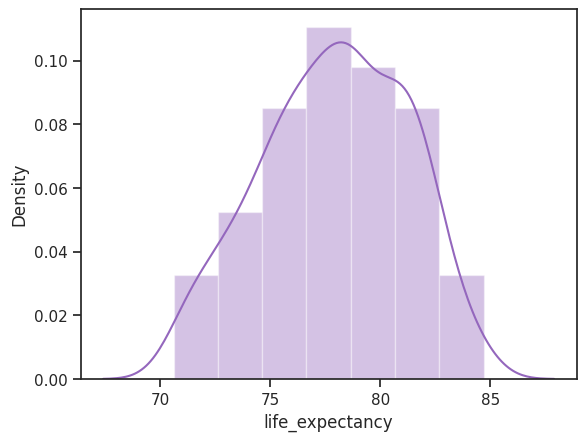

In [22]:
sns.distplot( df1['life_expectancy'], bins = 7)


#### 1.6.2 Categorical Attributes


In [23]:
cat_attributes.apply( lambda x: x.unique().shape[0] )
cat_attributes.columns

Index(['country'], dtype='object')

In [25]:
# Calcular frequências e proporções para a variável 'gênero'
country_freq = cat_attributes['country'].value_counts()
country_prop = cat_attributes['country'].value_counts(normalize=True)

# Exibir os resultados
print("\n--- Country ---")
print("Frequências:")
print(country_freq)
print("\nProporções:")
print(country_prop)


--- Country ---
Frequências:
country
Japan            51
USA              51
Germany          50
Canada           44
Great Britain    43
France           35
Name: count, dtype: int64

Proporções:
country
Japan            0.186131
USA              0.186131
Germany          0.182482
Canada           0.160584
Great Britain    0.156934
France           0.127737
Name: proportion, dtype: float64


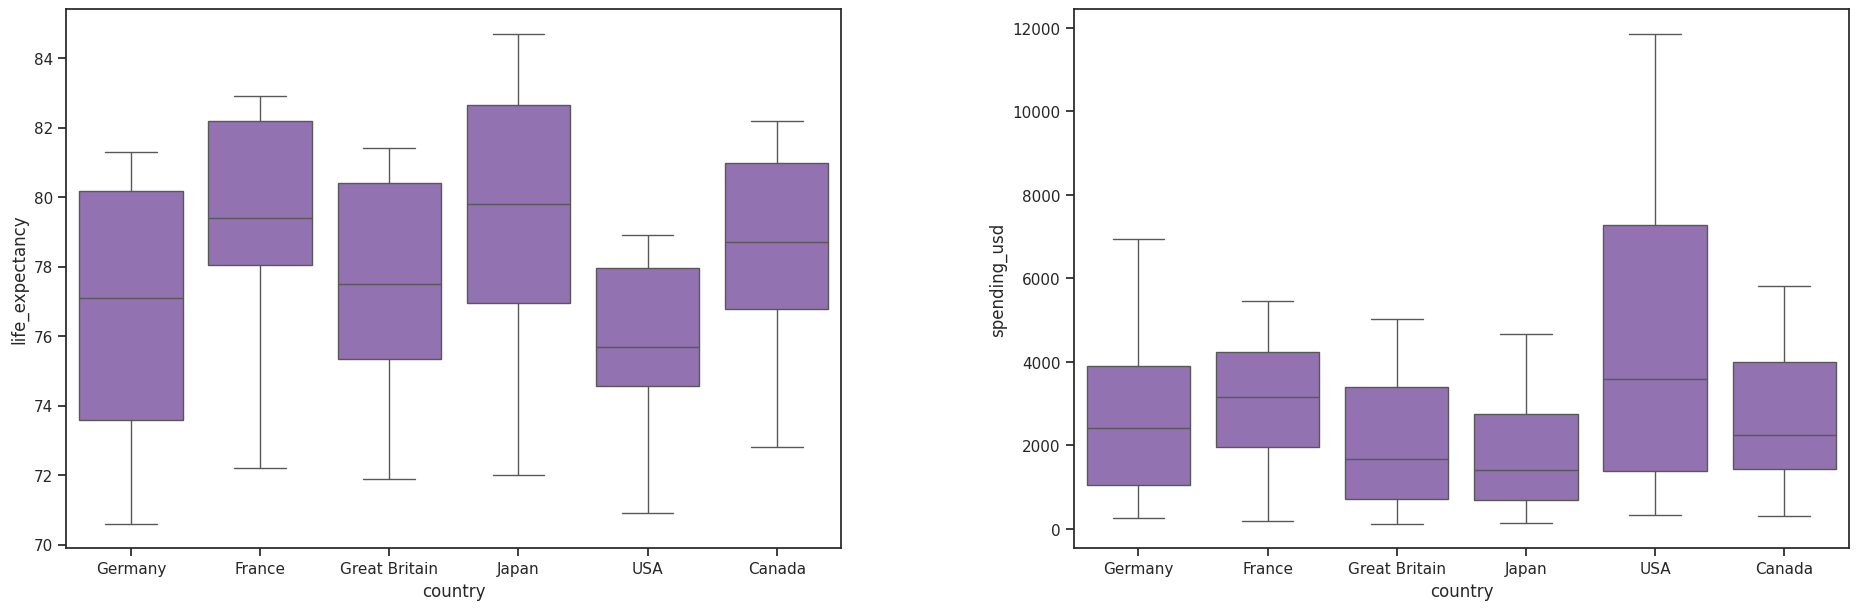

In [26]:
# Definindo o tamanho da figura e a distância entre os subplots
plt.figure(figsize=(23, 7))
plt.subplots_adjust(wspace=0.3)

plt.subplot( 1, 2, 1 )
sns.boxplot( x='country', y='life_expectancy', data=df1 )

plt.subplot( 1, 2, 2 )
sns.boxplot( x='country', y='spending_usd', data=df1 )

plt.show()



#USA concentração maior dos dados
#Japan tem uma mediana maior
#USA uma grande diferença de investimento em saúde (50% pro 75%)



## 2. Perguntas de partida e hipóteses

In [28]:
df2 = df1.copy()
#df2.columns

In [29]:
# Relação entre gastos em saúde e expectativa de vida:
# Comparação de gastos em saúde entre países
# Tendências temporais nos gastos em saúde
# Impacto de crises econômicas nos gastos em saúde
# Comparação de eficiência dos sistemas de saúde

#### 2.1 Análise Variável por variável

#### 2.2 Análise Bivariada (Hipóteses)

##### 2.2.1 Quanto maior o investimento na saúde maior a expectativa de vida?

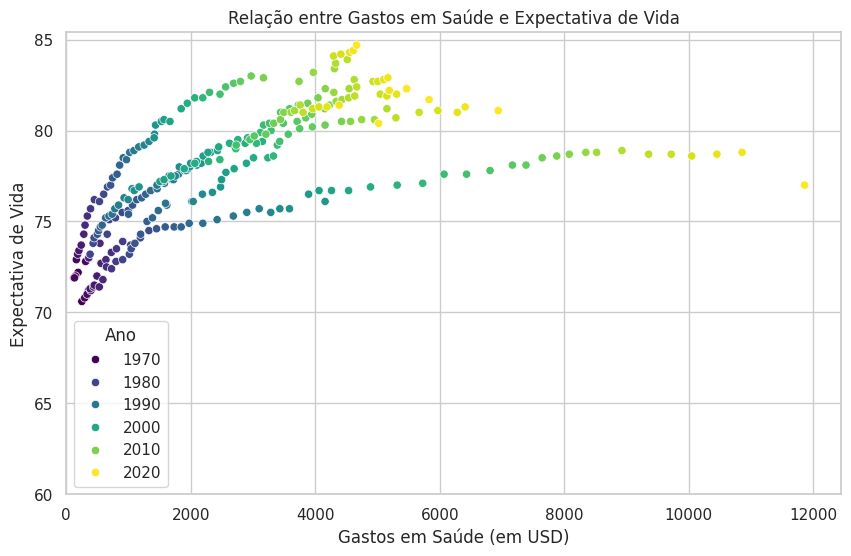

In [34]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='spending_usd', y='life_expectancy', data=df2, hue='year', palette='viridis')

# Adicionando títulos e rótulos
plt.title('Relação entre Gastos em Saúde e Expectativa de Vida')
plt.xlabel('Gastos em Saúde (em USD)')
plt.ylabel('Expectativa de Vida')

# Ajuste dos eixos
plt.xlim(0, None)  # Definindo o limite mínimo para o eixo x como 0, pode ajustar conforme necessário
plt.ylim(60, None)  # Definindo o limite mínimo para o eixo y como 0, pode ajustar conforme necessário

# legenda
plt.legend(title='Ano')

##### 2.2.2 Comparação de gastos em saúde entre países

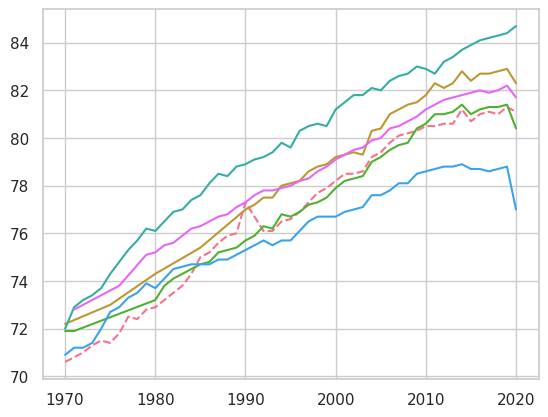

In [35]:
df2_germany  = df2[df2['country'] == 'Germany']
df2_france   = df2[df2['country'] == 'France']
df2_britain  = df2[df2['country'] == 'Great Britain']
df2_japan    = df2[df2['country'] == 'Japan']
df2_usa      = df2[df2['country'] == 'USA']
df2_canada   = df2[df2['country'] == 'Canada']

plt.plot(df2_germany['year'], df1_germany['life_expectancy'], '--' )
plt.plot( df2_france['year'],  df1_france['life_expectancy'] )
plt.plot(df2_britain['year'], df1_britain['life_expectancy'] )
plt.plot(  df2_japan['year'],   df1_japan['life_expectancy'] )
plt.plot(    df2_usa['year'],     df1_usa['life_expectancy'] )
plt.plot( df2_canada['year'],  df1_canada['life_expectancy'] )

##### 2.2.3 Existe uma tendênciaa temporal nos gastos em saúde


###### Method 1

/tmp/ipykernel_3642/600296085.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y='spending_usd', data=df2, ci=None)  # ci=None para não mostrar intervalo de confiança


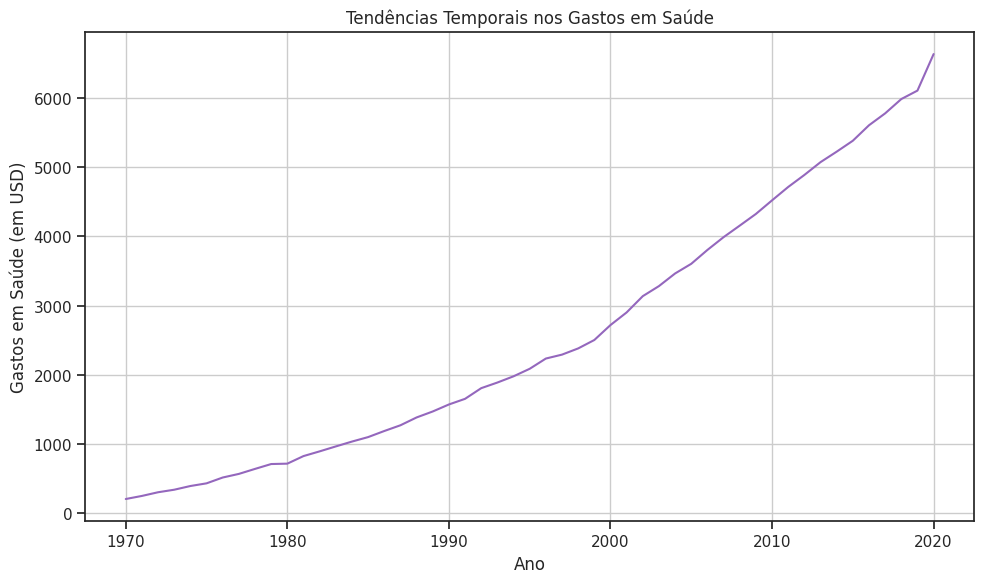

In [32]:
# Plotar o gráfico de linha
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='spending_usd', data=df2, ci=None)  # ci=None para não mostrar intervalo de confiança

# Adicionar títulos e rótulos
plt.title('Tendências Temporais nos Gastos em Saúde')
plt.xlabel('Ano')
plt.ylabel('Gastos em Saúde (em USD)')

# Personalizar estilo e cores
sns.set_style("whitegrid")  # Define o estilo de fundo
sns.set_palette("husl")  # Define a paleta de cores

# Incluir informações adicionais
plt.grid(True)  # Adiciona linhas de grade para facilitar a leitura
plt.tight_layout()  # Ajusta o layout para evitar cortes
plt.show()

###### Method 2 (Consideração que o dinheiro tem valor no tempo)

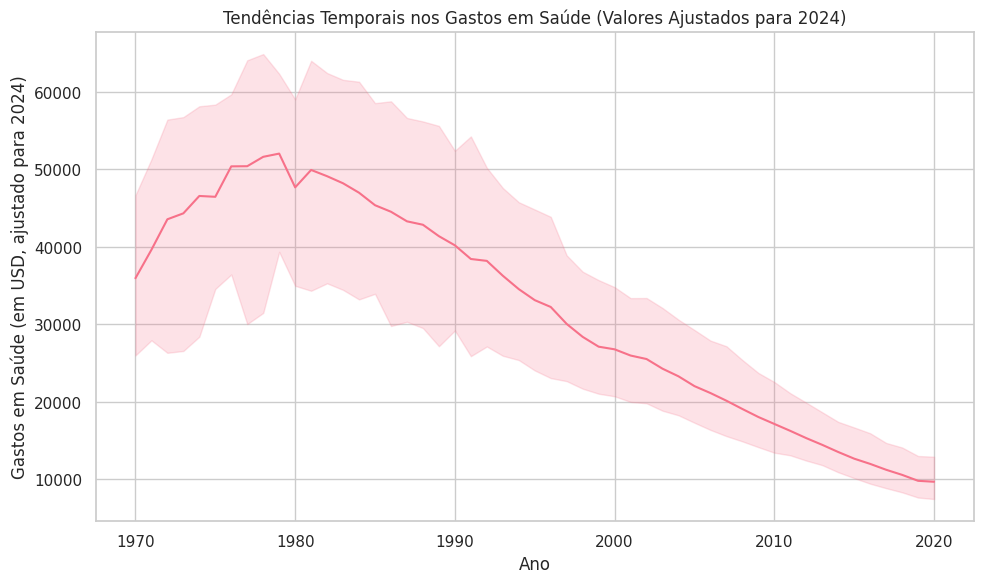

In [33]:
# Fator de ajuste temporal para converter os valores para 2024 (por exemplo, 1.05 para um aumento de 5%)
fator_ajuste = 1.10

# Ajustar os valores dos gastos em saúde para 2024
df2['spending_2024'] = df2['spending_usd'] * (fator_ajuste ** (2024 - df2['year']))

# Plotar o gráfico de linha com os valores ajustados para 2024
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='spending_2024', data=df2)

# Adicionar títulos e rótulos
plt.title('Tendências Temporais nos Gastos em Saúde (Valores Ajustados para 2024)')
plt.xlabel('Ano')
plt.ylabel('Gastos em Saúde (em USD, ajustado para 2024)')

# Personalizar estilo e cores (opcional)
sns.set_style("whitegrid")
sns.set_palette("husl")

# Adicionar grade
plt.grid(True)
plt.tight_layout()
plt.show()

##### 2.2.4 As principais crises economicas impactaram nos gastos na área da saúde


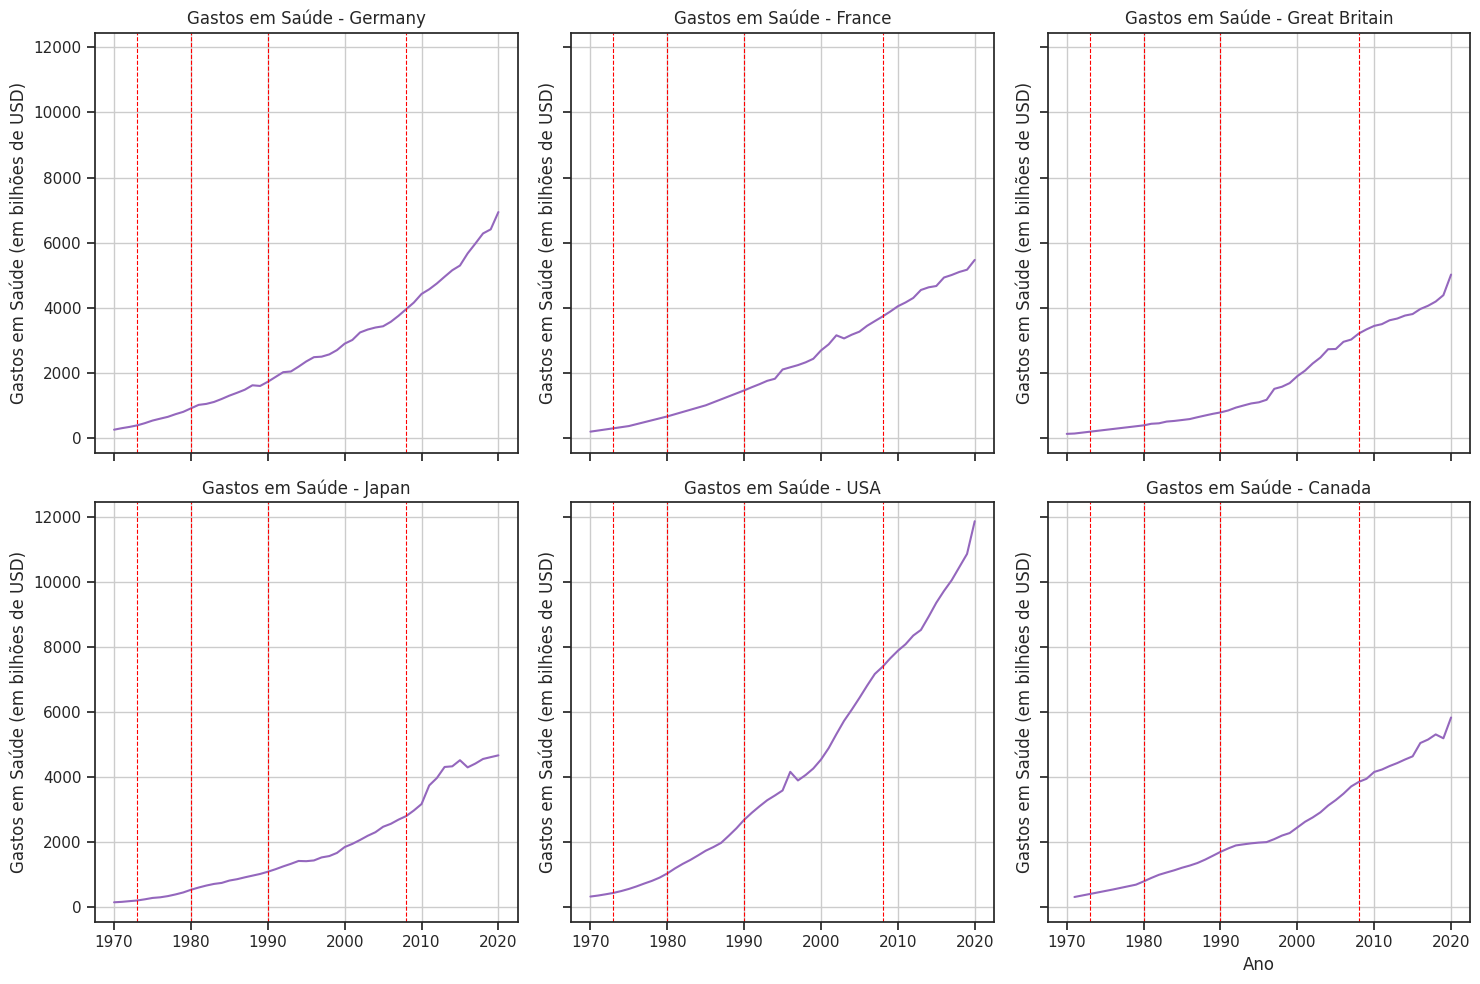

In [31]:
# Definir os anos das crises econômicas (exemplo)
crisis_years = [1973, 1980, 1990, 2008]

# Obter a lista de países únicos
countries = df2['country'].unique()

# Criar subgráficos para cada país em uma matriz 2x3
fig, axs = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)

# Iterar sobre cada país e preencher a matriz de subgráficos
for i in range(2):
    for j in range(3):
        # Verificar se ainda há países para plotar
        if len(countries) > 0:
            # Selecionar o próximo país da lista
            country = countries[0]
            countries = countries[1:]

            # Filtrar os dados para o país atual
            country_data = df2[df2['country'] == country]

            # Plotar os gastos com saúde
            axs[i, j].plot(country_data['year'], country_data['spending_usd'], label='Gastos em Saúde')

            # Destacar os anos de crises econômicas
            for year in crisis_years:
                axs[i, j].axvline(x=year, color='red', linestyle='--', linewidth=0.8)

            # Configurações do subgráfico
            axs[i, j].set_title(f'Gastos em Saúde - {country}')
            axs[i, j].set_ylabel('Gastos em Saúde (em bilhões de USD)')
            axs[i, j].grid(True)
        else:
            # Remover os eixos vazios
            axs[i, j].axis('off')

# Configurações do gráfico geral
plt.xlabel('Ano')
plt.tight_layout()
plt.show()

##### 2.2.5 Existe algum país que apresentou uma melhor eficiência, considerando essa como um montante de gastos menor em relação a expectiva de vida alcançada


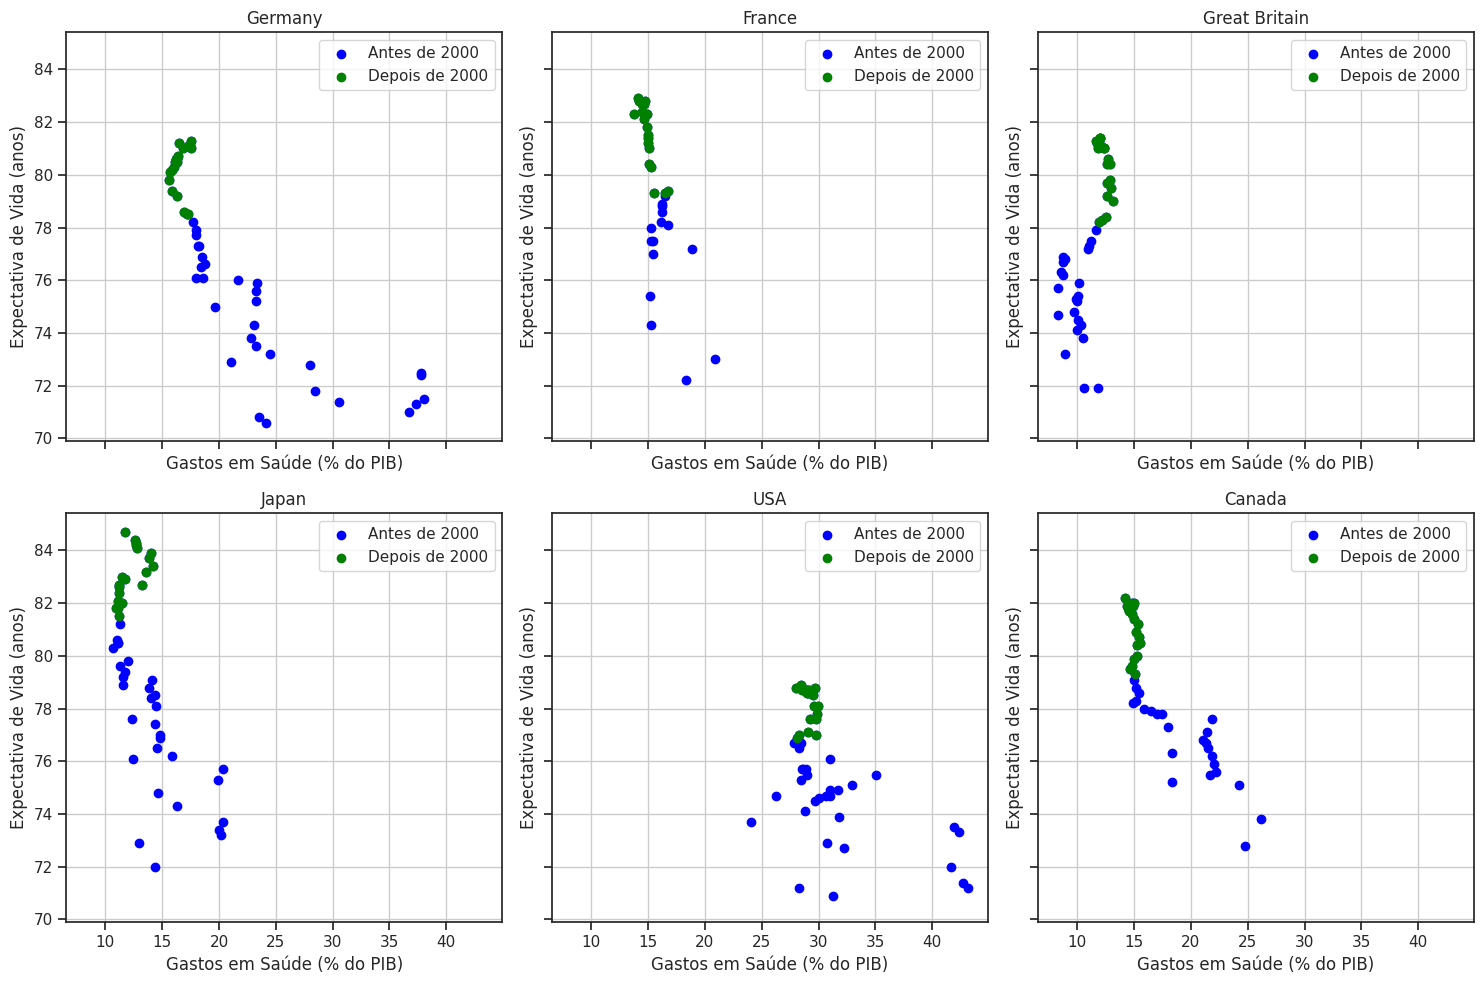

In [30]:
# Calcular os gastos em saúde como porcentagem do PIB
df2['health_spending_pct_gdp'] = (df2['spending_usd'] / df2.groupby('year')['spending_usd'].transform('sum')) * 100

# Criar subgráficos em uma matriz 2x3
fig, axs = plt.subplots(2, 3, figsize=(15, 10), sharex=True, sharey=True)

# Obter a lista de países únicos
countries = df2['country'].unique()

# Iterar sobre cada país e preencher a matriz de subgráficos
for i in range(2):
    for j in range(3):
        # Verificar se ainda há países para plotar
        if len(countries) > 0:
            # Selecionar o próximo país da lista
            country = countries[0]
            countries = countries[1:]

            # Filtrar os dados para o país atual
            country_data = df2[df2['country'] == country]

            # Filtrar os dados para depois dos anos 2000
            country_data_recent = country_data[country_data['year'] > 2000]

            # Plotar o gráfico de dispersão para os anos depois de 2000 em verde
            axs[i, j].scatter(country_data['health_spending_pct_gdp'], country_data['life_expectancy'], color='blue', label='Antes de 2000')
            axs[i, j].scatter(country_data_recent['health_spending_pct_gdp'], country_data_recent['life_expectancy'], color='green', label='Depois de 2000')

            # Configurações do subgráfico
            axs[i, j].set_title(f'{country}')
            axs[i, j].set_xlabel('Gastos em Saúde (% do PIB)')
            axs[i, j].set_ylabel('Expectativa de Vida (anos)')
            axs[i, j].grid(True)
            axs[i, j].legend()
        else:
            # Remover os eixos vazios
            axs[i, j].axis('off')

# Ajustar layout
plt.tight_layout()
plt.show()

## 3. Insights

## 4. Observação